# 5 THE BEST ESTIMATOR - MODELO BASE

## MODELAR ALGORITMO DE CLASIFICACIÓN - MODELO BASE

Los modelos que van a competir mediante el GridSearch:

![Alt text](image.png)

## IMPORTACIÓN DE PAQUETES

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Crear train and test
from sklearn.model_selection import train_test_split

#Modelos seleccionados por LazyPredict
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC

#Optimizar modelos
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

#Crear Pipeline

from sklearn.pipeline import Pipeline

import cloudpickle

import warnings
warnings.filterwarnings("ignore")

## IMPORTACIÓN DE DATOS

### CARGAR LOS DATOS

In [2]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon_oe.pickle')
df.head()

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe,target
0,0.0,0.0,1.0,1.0,1.0,0.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2.0,2.0,2.0,2.0,2.0,2.0,0
3,0.0,0.0,2.0,2.0,2.0,0.0,0
4,1.0,1.0,2.0,2.0,2.0,1.0,0


## SEPARAR PREDICTORAS Y TARGET

In [3]:
x = df.drop(columns= 'target').copy()
y = df.target.copy()

In [4]:
x.head()

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe
0,0.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0
3,0.0,0.0,2.0,2.0,2.0,0.0
4,1.0,1.0,2.0,2.0,2.0,1.0


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [6]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [7]:
pipe = Pipeline([('algoritmo', LogisticRegression())])

grid = [

            {
                'algoritmo' : [LabelPropagation()]
            },

            {
                'algoritmo' : [RidgeClassifier()]
            },

            {
                'algoritmo' : [RidgeClassifierCV()]
            },

            {
                'algoritmo' : [LogisticRegression()]
            },

            {
                'algoritmo' : [LGBMClassifier()]
            },

            {
                'algoritmo' : [NuSVC()]
            }

        ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [8]:
grid_search = GridSearchCV(estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           n_jobs= -1,
                           verbose=0)


In [9]:
modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017664,0.015424,0.006618,0.001981,LabelPropagation(),{'algoritmo': LabelPropagation()},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
1,0.014150,0.006578,0.004234,0.000971,RidgeClassifier(),{'algoritmo': RidgeClassifier()},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.010732,0.006524,0.003570,0.000472,RidgeClassifierCV(),{'algoritmo': RidgeClassifierCV()},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
3,0.009355,0.002684,0.003703,0.000848,LogisticRegression(),{'algoritmo': LogisticRegression()},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
5,0.004065,0.001463,0.004509,0.001267,NuSVC(),{'algoritmo': NuSVC()},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.187360,0.029756,0.004786,0.000399,LGBMClassifier(),{'algoritmo': LGBMClassifier()},0.888889,0.638889,0.972222,0.888889,0.851852,0.848148,0.111819,6


In [10]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', LabelPropagation())])

In [11]:
modelo.best_params_

{'algoritmo': LabelPropagation()}

In [12]:
modelo.best_score_

1.0

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [13]:
modelo_best_estimator = modelo

### Guardar modelo, parámetros y score

In [14]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PRECEDIR Y EVALUAR SOBRE EL TRAIN

#### Predecir sobre el train

In [15]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [16]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        18

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

#### Predecir sobre la validación

In [17]:
pred = modelo.best_estimator_.predict(val_x)
pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]

#### Evaluar sobre la validación

In [18]:
v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 1.0
Roc AUC: 1.0
Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         7

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

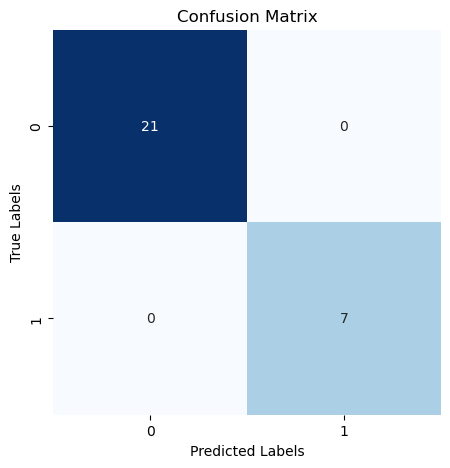

In [21]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

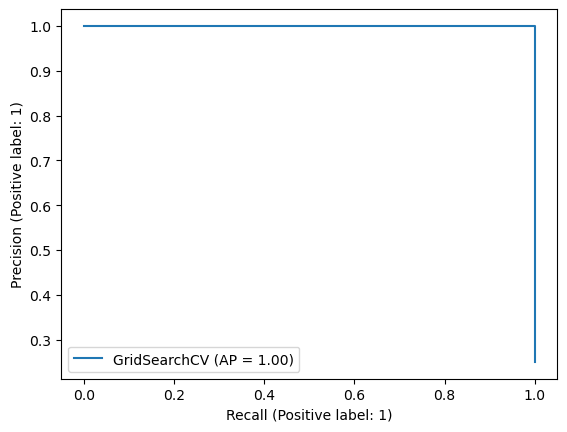

In [22]:
PrecisionRecallDisplay.from_estimator(modelo_best_estimator, val_x, val_y)

El mejor best_threshold: 1.0


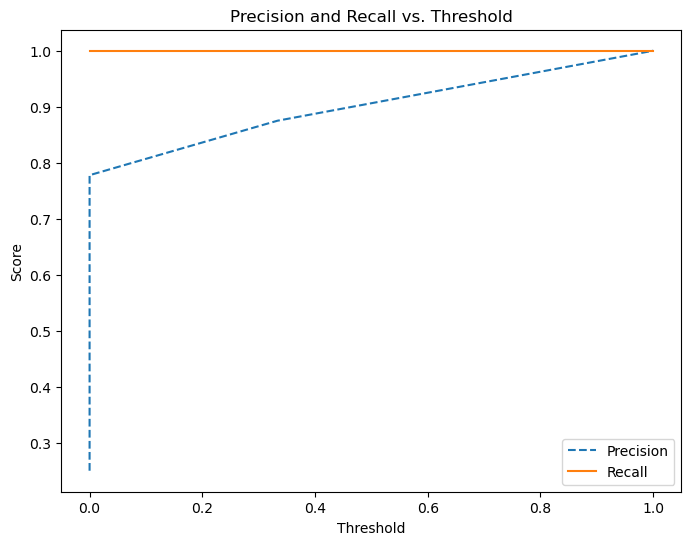

In [ ]:
# Calcula la curva de precisión y recall para diferentes umbrales de corte
precision, recall, thresholds = precision_recall_curve(val_y, pred_proba)

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')

# Encuentra el umbral que maximiza F1-score (o ajusta según tus necesidades)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold)

### ROC Chart

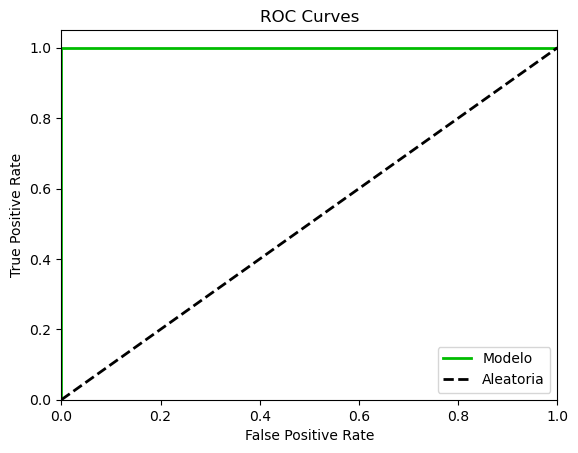

In [ ]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [ ]:
version_estimator = '_v0'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'LabelPropagation_v0.pickle'

In [ ]:
m_best_estimator

'LabelPropagation'

In [ ]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [ ]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Gridsearch con modelos bases"
x_columns = list(x.columns)
y_target = y.name


In [ ]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': v_roc_auc_proba,
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                     LabelPropagation
m_Best_paramans                     {'algoritmo': LabelPropagation()}
m_Best_Score                                                      1.0
t_accuracy                                                        1.0
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                                   1.0
v_roc_auc                                                         1.0
v_accuracy                                                        1.0
v_report                          precision    recall  f1-score   ...
comentarios                              Gridsearch con modelos bases
predictoras_X       [industrial_risk_oe, management_risk_oe, finan...
target_y                                                       target
Name: LabelPropagation_v0.pickle, dtype: object

In [ ]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [ ]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: Vemos que el modelo ha dado muy buenos resultados con tanto con el modelo base de LabelPropagation() tanto para los datos de entrenamiento como los de validación. 

**PRÓXIMOS PASOS:**

Realizaremos el modelo definitivo con este modelo. Si detectamos que el modelo está sobre ajustado, haremos un nuevo modelo con  hiperparámetros para evitar el sobre ajuste y evaluaremos nuevamente el modelo.